In [45]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 1. Creating Graph

nx.Graph()

add_node()

add_edge()

add_nodes_from()

add_edges_from()

.nodes

.edges

remove_node()

remove_edge()

remove_nodes_from()

remove_edges_from()

In [46]:
G=nx.Graph() # Creating a new Graph (G must be capital letter)
type(G)

networkx.classes.graph.Graph

In [47]:
# add node
G.add_node(1)
G.add_node('a')
print(G)

Graph with 2 nodes and 0 edges


In [48]:
# add edge
G.add_edge(1,'a')
print(G)

Graph with 2 nodes and 1 edges


In [49]:
nodes_to_add=[2,3,4,5,6]
edges_to_add=[(2,'a'),(3,4),(5,6)]
G.add_nodes_from(nodes_to_add) # add nodes from list
G.add_edges_from(edges_to_add) # add edges from list(consists of 2-tuple)
print(G)

Graph with 7 nodes and 4 edges


In [50]:
G.nodes # all nodes in graph

NodeView((1, 'a', 2, 3, 4, 5, 6))

In [51]:
G.edges # all edges in graph

EdgeView([(1, 'a'), ('a', 2), (3, 4), (5, 6)])

In [52]:
# You can save node attributes like a dictionary
G.nodes[1]['age']=50 
G.nodes[1]['weight']=65
G.nodes[1]

{'age': 50, 'weight': 65}

In [53]:
# you can save edge attributes like a dictionary
G.edges[3,4]['weight']=3
G.edges[3,4]['relationship']='family'
G.edges[3,4]

{'weight': 3, 'relationship': 'family'}

In [54]:
# you can remove nodes or edges if they are exist
G.remove_edge(3,4)
G.remove_node('a')

If you want to remove multiple nodes or edges, you can use 'remove_nodes_from()' or 'remove_edges_from()'

# 2. degree, neighbors

In [55]:
F=nx.Graph()
N=10
F.add_nodes_from(np.arange(N))
print(F.size()) # number of edges(links)
print(F.order()) # number of nodes

0
10


has_node() and has_edge() function will return boolean value.

In [56]:
F.has_node(10)

False

In [57]:
for i in F.nodes:
  if F.has_edge(i,(i+1)%N)==False:
    F.add_edge(i,(i+1)%N)
print(F.size())
print(F.order())

10
10


In [58]:
F.edges

EdgeView([(0, 1), (0, 9), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

In [59]:
for u,v in F.edges:
  if np.random.random()<0.5:  # with probability 0.5
    F.remove_edge(u,v)        # remove edge

In [60]:
F.edges

EdgeView([(4, 5), (5, 6), (6, 7), (8, 9)])

In [61]:
for i in F.nodes:
  for j in F.nodes:
    if F.has_edge(i,j)==False and np.random.random()<0.2:
      F.add_edge(i,j)  # if there is no edge, add a edge with probability 0.2

In [62]:
F.edges

EdgeView([(0, 0), (0, 3), (0, 5), (0, 6), (1, 7), (1, 9), (1, 5), (2, 7), (2, 3), (2, 8), (3, 3), (3, 7), (3, 6), (4, 5), (5, 6), (5, 5), (5, 8), (6, 7), (6, 8), (8, 9)])

In [63]:
F.degree(0) # number of neighbors (number of links at a certain node)

5

In [64]:
F.neighbors(0) # neighbors

In [65]:
list(F.neighbors(0))  # list of neighbors

[0, 3, 5, 6]

In [66]:
for i in F.nodes:
  for j in F.neighbors(i):
    print(i,j)

0 0
0 3
0 5
0 6
1 7
1 9
1 5
2 7
2 3
2 8
3 0
3 2
3 3
3 7
3 6
4 5
5 4
5 6
5 0
5 1
5 5
5 8
6 5
6 7
6 0
6 3
6 8
7 6
7 1
7 2
7 3
8 9
8 2
8 5
8 6
9 8
9 1


If a graph is directed graph, you can use **in_degree, out_degree, successors, predecessors** instead of **degree** and **neighbors**.

# 3. Plotting Graph

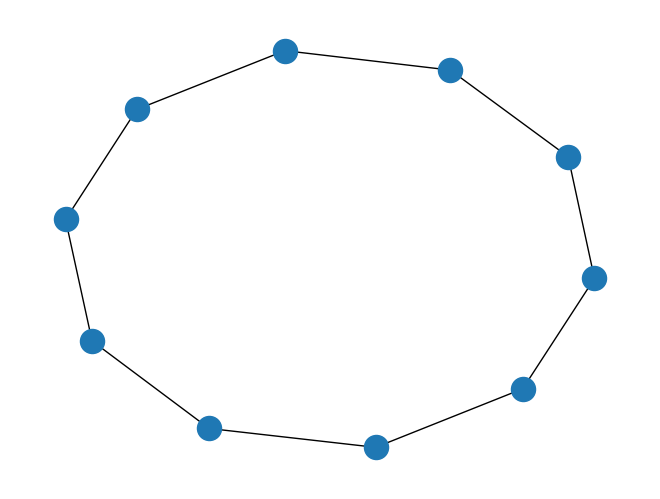

In [67]:
# cycle graph
cycle=nx.cycle_graph(10)
nx.draw(cycle)

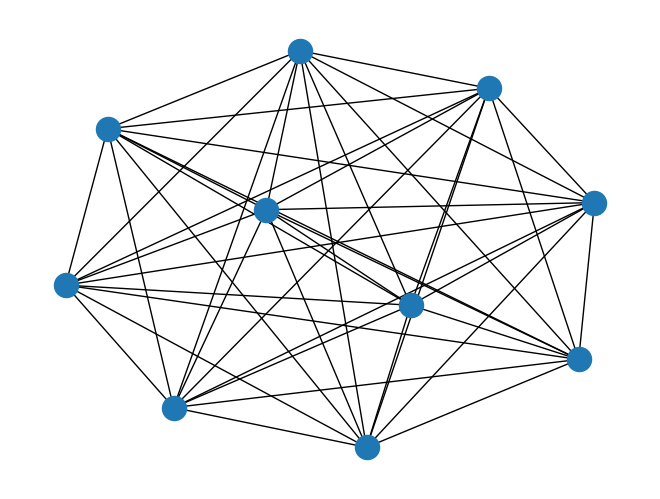

In [68]:
# complete graph
complete=nx.complete_graph(10)
nx.draw(complete)

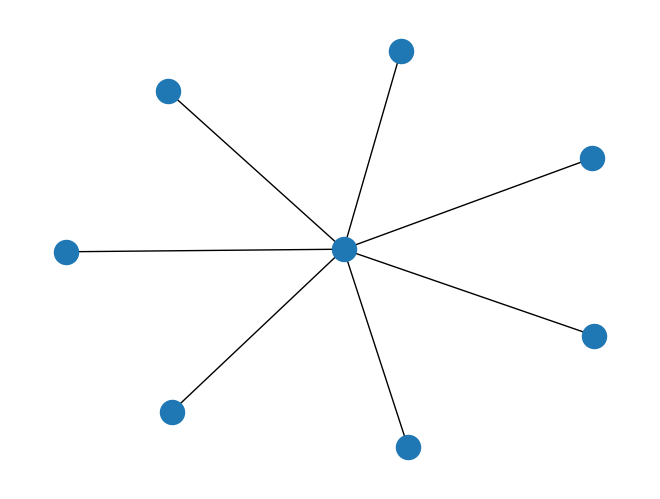

In [69]:
# star graph
star=nx.star_graph(7)
nx.draw(star)

If you use nx.draw() function, position of the nodes is automatically chosen

If you want to customize the location of the nodes, you have to use nx.draw_networkx_nodes() or nx.draw_networkx_edges() function.

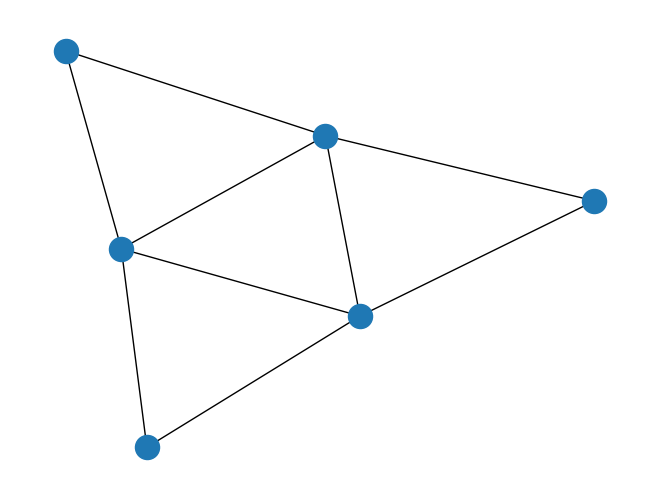

In [70]:
G=nx.Graph()
G.add_nodes_from(np.arange(6))
G.add_edges_from([(0,1),(0,2),(1,2),(1,3),(1,4),(2,4),(2,5),(3,4),(4,5)])
nx.draw(G)

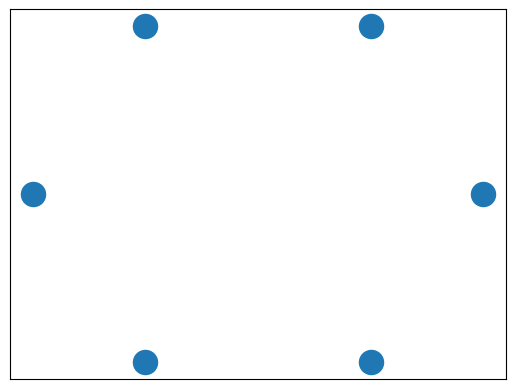

In [71]:
position={0:(0.5,1), 1:(1.5,1), 2:(0,0), 3:(0.5,-1), 4:(1.5,-1), 5:(2,0)}
nx.draw_networkx_nodes(G,pos=position)

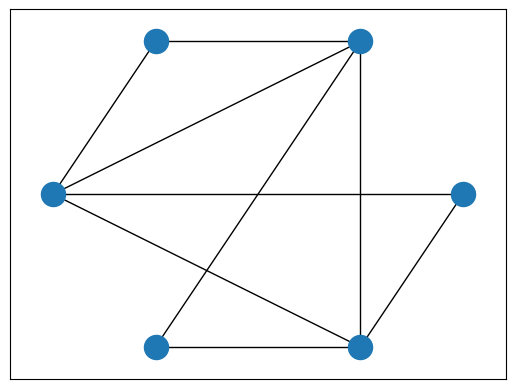

In [72]:
position={0:(0.5,1), 1:(1.5,1), 2:(0,0), 3:(0.5,-1), 4:(1.5,-1), 5:(2,0)}
nx.draw_networkx_nodes(G,pos=position)
nx.draw_networkx_edges(G,pos=position)

If network size is large, it is difficult to assign coordinate to every node. There are some useful algorithms to produce newtork layout.

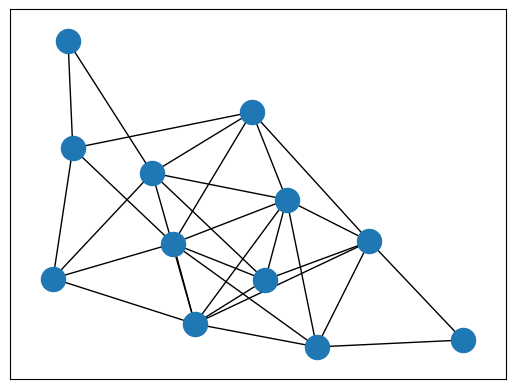

In [73]:
G=nx.gnm_random_graph(12,30) # random graph
position=nx.layout.kamada_kawai_layout(G) # kamada kawai layout
nx.draw_networkx_nodes(G,pos=position)
nx.draw_networkx_edges(G,pos=position)

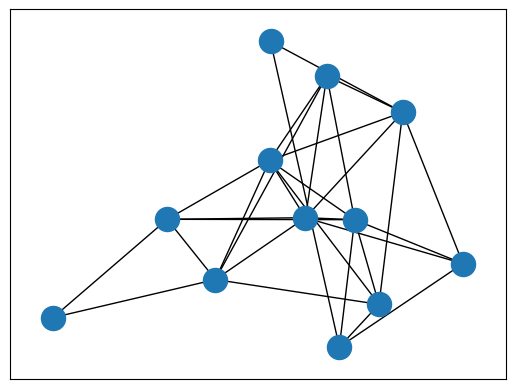

In [74]:
position=nx.layout.spring_layout(G) # spring layout
nx.draw_networkx_nodes(G,pos=position)
nx.draw_networkx_edges(G,pos=position)

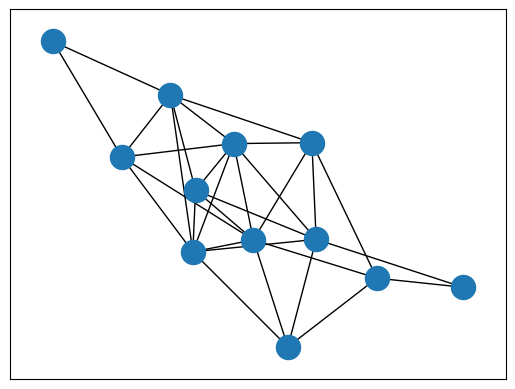

In [75]:
position=nx.layout.fruchterman_reingold_layout(G) # fruchterman reingold layout
nx.draw_networkx_nodes(G,pos=position)
nx.draw_networkx_edges(G,pos=position)

If you don't want to customize locations or other options, then use nx.draw() instead.

# Exercise

**Problem 1. Write a code for random graph with n number of nodes and p wiring probabilities.**

1. Create a network which has n number of nodes.

2. For every pair of nodes, connect edges with probability of p

plot the result for n=100, p=0.01, 0.05, 0.1, 0.5

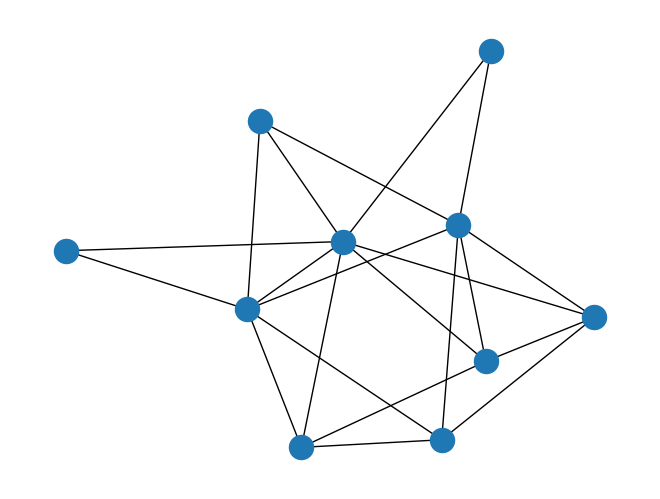

In [82]:
import networkx as nx
import random

def random_np_graph(n, p):
    graph = nx.Graph()

    # Add n nodes to the graph
    graph.add_nodes_from(range(n))

    # Iterate over all pairs of nodes and add an edge with probability p
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                graph.add_edge(i, j)

    return graph  
g=random_np_graph(10,0.5)
nx.draw(g)

**Problem 2. Write a code for random graph with n number of nodes and m number of links.**

1. Create a network which has n number of nodes.

2. Randomly choose a pair of nodes.

3. If there is no edge betweeen a pair of nodes, add edge. If there is, go to 2

4. Repeat 2-3 until there are m number of edges.

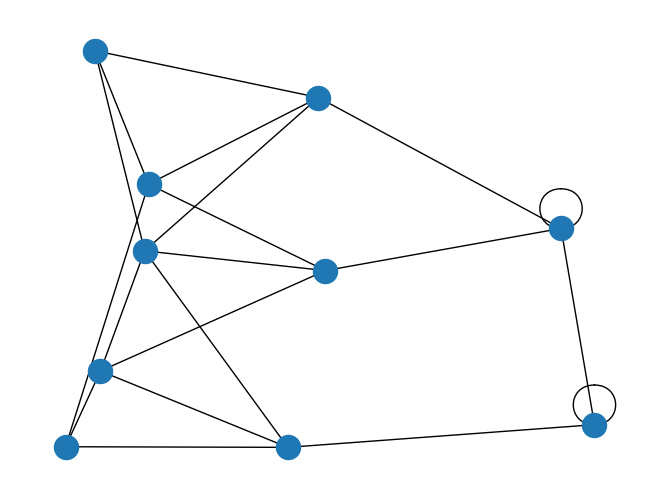

In [86]:
def random_nm_graph(n, m):
    graph = nx.Graph()

    # Add n nodes to the graph
    graph.add_nodes_from(np.arange(n))

    # Add m edges to the graph
    while len(graph.edges) < m:
        # Randomly choose a pair of nodes
        u, v = np.random.randint(n, size=2)

        # If there is no edge between the nodes, add one
        if graph.has_edge(u, v)==False and i!=j:
            graph.add_edge(u, v)

    return graph

G=random_nm_graph(10,20)
nx.draw(G)

**Problem 3. If we choose proper m and p, nm graph and np graph produce similar result. If np graph and nm graph are almost identical, what is the relationship between p and m? (hint: what is the maximum number of links of a graph which has n number of nodes?)**

Answer: 